In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
y_pred: np.ndarray = np.linspace(-2, 2, 400)
y: float = 1.0

In [44]:
def squared_loss(y_pred: np.ndarray, y: float) -> np.ndarray:
    return (y_pred - y) ** 2 / 2
def logistic_loss(y_pred: np.ndarray, y: float) -> np.ndarray:
    return np.log(1 + np.exp(-y*y_pred))
def hinge_loss(y_pred: np.ndarray, y: float) -> np.ndarray:
    return np.maximum(np.zeros_like(y_pred), 1 - y*y_pred)
def zero_one_error(y_pred: np.ndarray, y: float) -> np.ndarray:
    return np.sign(y_pred) != y

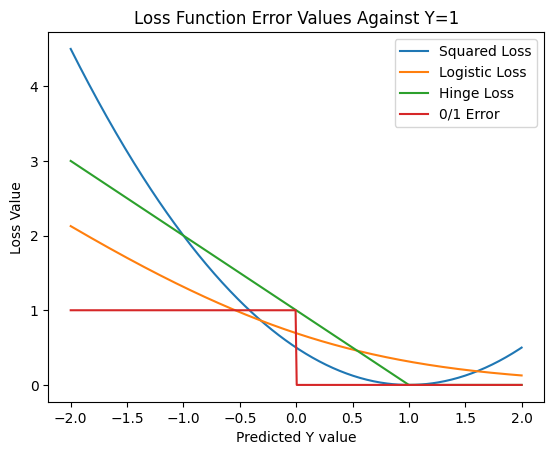

In [46]:
plt.plot(y_pred, squared_loss(y_pred, y), label="Squared Loss")
plt.plot(y_pred, logistic_loss(y_pred, y), label="Logistic Loss")
plt.plot(y_pred, hinge_loss(y_pred, y), label="Hinge Loss")
plt.plot(y_pred, zero_one_error(y_pred, y), label="0/1 Error")
plt.legend()
plt.title("Loss Function Error Values Against Y=1")
plt.xlabel("Predicted Y value")
plt.ylabel("Loss Value")
plt.show()